# 泊松噪音（Poisson Noise）

简单的说就是满足泊松分布的噪音，你会觉得它和正态分布很相似，其实如果我们采集的数据越多，精度越密，其形态上它越发接近高斯分布函数，也就是正态分布，是常见的一种满足指数函数分布的离散模型。

## 泊松分布（Poisson Distribution）

泊松噪音存在的根本原因是因为光是由离散的光子构成（光的粒子性）。光源发出的光子打在CMOS上，从而形成一个可见的光点。光源每秒发射的光子到达CMOS的越多，则该像素的灰度值越大。但是因为光源发射和CMOS接收之间都有可能存在一些因素导致单个光子并没有被CMOS接收到或者某一时间段内发射的光子特别多，所以这就导致了灰度值会有波动，也就是所谓的散粒噪声。举例而言，在光源强度比较低的时候，比如说设定光强为每秒5个光子的时候，那么每秒实际CMOS接受到的光子数可能从0到10（服从泊松分布）[^1]。 

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210125231410982.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

那么，泊松分布或者泊松噪音的基本形式是怎样的呢？

$$
P(x=k) = \frac{e^{- \lambda} \lambda ^ k}{k!}
$$

这里，$\lambda$ 表示的是期望值，既某过程中，在它的给定时间内，事件的发生次数，比方说假设世界杯赛场上，每场比赛的进球数大约在2.5个球，那么$\lambda=2.5$，因此假设对于一场比赛，分别发生0次进球，1次进球，2次进球的概率是[^2]？

出现0次进球
$$
P(x=0) = \frac{2.5^0}{0!} e^{-2.5}  \approx  0.082
$$

出现1次进球
$$
P(x=1) = \frac{2.5^1}{1!} e^{-2.5}  \approx  0.205
$$

出现2次进球
$$
P(x=2) = \frac{2.5^2}{2!} e^{-2.5}  \approx  0.257
$$

出现3次进球
$$
P(x=3) = \frac{2.5^3}{3!} e^{-2.5}  \approx  0.213
$$

$$
\cdots
$$

现在我们把数据绘制到图表上，根据我们推算的进球概率，这样一个概率分布，就是泊松分布了。

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210125234347189.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

## 泊松分布与光通量

接下来，我们把这个进球的过程换成单位时间内，有多少光子打到像素传感器上的过程[^3]。为了说明这个问题，我们先解释一下照片成像的过程。我们在初中阶段的光学课程上，知道以前的老式相机是光束通过透镜，与胶片上的光感材料作用，把影像印在了胶片上，这个过程和小孔成像很类似。

而现代数码相机的普及，最大的区别就是胶片变成了光传感器。也就是CMOS传感器。由于它是一种光敏材料，在被一定量的光子照射后会产生电子，继而引起数字信号的变化。而在一个CMOS传感器上，有极多的传感单元，而这些传感单元，你可以理解为我们平常提到的像素。

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210202133725696.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

而光子作用在每一个传感单元上所产生的信号不同，最终组合在一起成为了像素照片。所以如果我们把这个过程简化后，假设在单位时间内，有一束光包含有400个光子打到了相机的CMOS传感器上，从微观上说，这些光子是随机的落入到不同的像素传感器内。

因此对应一个像素传感器来说，如果我们统计一个像素在单位时间$t$内，会有多少个光子落入到一个像素传感器内，那么可能会得出$[0,4]$这样的一个结果。那么统计平均落入的光子数，并且绘制它的落入分布情况，我们可能会得出一个泊松分布。

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210202132226882.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

假设这个情况的$\lambda=1.05$，也就是平均每个像素传感器落入1.05个光子，那么它的概率分布图，也就是下面这个样子了：

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210202140137721.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

那么这个模型的标准差$\sigma =  \sqrt{\frac{\sum (x_i - \bar{x})}{n}} \approx 1.024$，而这里的1.024就是**光子散粒噪音（photon shot noise）**

由于光子极微小，尽管我们假设从物体反射进入到CMOS传感器上的光束在单位时间内为400个光子，但这数量本质上来说是估算，或者说是平均数。因此实际上在单位时间$t$内，传入CMOS的光子数可能是401，也可能是387个光子。

尽管从宏观上光子传播沿直线传播，但在**微观上也就是光子运动轨迹存在一定程度的不确定性，这必然导致了噪音的产生。**

所以我们可以直观的凭本能知道，如果这样一些带着随机运动的粒子，在击打到某个平面位置时，尽管大范围上符合某个范围的分布区间，但如果细致的观察，每一个落点存在着一定的误差（“噪音”）。

这就像是用霞弹枪、或者抛洒石灰，或者颜料，即便用同一种颜料，同一个角度抛洒到画布上，任然无法做出两幅一样的画的那种奇妙的感觉。

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210202151159558.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

那么，光子到达图像传感器的这些波动如何影响我们的图像？噪点会使照片的视觉细节失真。而下图显示了一组模拟的图像，其中指定了每个像素的平均粒子数或光子数。 这表明对于低数量的光子，噪声占主导地位，但是随着光子数量（光通量）的增加，图像结构变得更加明显。

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210202151347316.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

所以，如果我们要试图模拟泊松噪音，也就是单位像素传感器$p$在单位时间$t$内捕捉到的有效光子量，那么这个过程就是一个所谓的 **“泊松过程(Poisson Process)”**。

## 泊松过程(Poisson Process)

现在，我们已经知道了一个概率事件它的随机概率发生分布情况，如果近似符合二项分布的，就是一个泊松分布。现在我们需要反过来，去做一个符合这个分布的随机事件发生过程，而它就是所谓的泊松过程了。

回到上面的例子，如果在单位事件内$t$，向CMOS传感器发射了（或者说物体反射了）一束包含400个光子光束，落在单个像素传感器上的光子数为 $P_s \in[0, 4]$ ，我们在不考虑这些光子激发的电子有效率的情况下，假设1个光子落入了像素传感器就会产生1个电子。

也就是说，在单位时间内，一个像素可能接收到0个、1个、2个、3个、4个光子[^4]。而如果我们把观察时间微分为$\Delta t$，如果假设在某一个时间内，发生了1个光子击中像素传感器，那么接下来再发生一次光子击中像素传感器的概率就会下降；如果再次发生一次击中，那么等待第三次发生的概率就会更小，直到全部观察时间结束。

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210202170349393.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

这一过程符合于指数，通常情况下，我们用下式表示这个过程，用通俗的话来描述：**就是当某事件发生后，后续事件再次发生的概率，随着时间增加而减少**

$$P(t_{wait} > t_{event}) = e^{- \sigma \cdot t}$$

这里$t$表示时间变量，$\sigma$表示单位时间内$\Delta t$事件怕平均发生次数，或者说是期望。那么，我们同样可以得出某事件发生前的前面的事件发生概率，**随着时间减少而增加**

$$P(t_{wait} \leq  t_{event}) = 1 - e^{- \sigma \cdot t}$$

[^1]: [《泊松噪音》](http://www.pantsiao.com/wiki/%E6%B3%8A%E6%9D%BE%E5%99%AA%E5%A3%B0%EF%BC%88%E6%95%A3%E7%B2%92%E5%99%AA%E5%A3%B0%EF%BC%89/)

[^2]: [Poisson Distribution, Alexander Katz, Andy Hayes, Tejas Suresh, etc.](https://brilliant.org/wiki/poisson-distribution/)

[^3]:[How to Create Awesome Noise That Is Actually Real, Erez Posner
](https://medium.com/datadriveninvestor/how-to-create-awesome-noise-that-is-actually-real-cf178c9f0ae0)

[^4]:[The Poisson Distribution and Poisson Process Explained, Will Koehresen](https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459)

## Knuth算法

首先，回顾泊松分布的函数：

$$
P(x=k) = \frac{e^{- \lambda} \lambda ^ k}{k!}
$$

其中，$\lambda$是期望值，而$e^{-\lambda}$则是单调递减的指数函数，而我们所需要关心的函数区间是$\in[0, \infty]$, 而观察函数图像，等效于一半指数函数$a^x$，其中$0 < a < 1$
![在这里插入图片描述](https://img-blog.csdnimg.cn/20210202225724225.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

另一方面，根据之前的关于 **“泊松等待”** 里介绍的，对于已发生的事件A，在接下来的时间里，随着时间增加，事件发生概率呈指数级下降。

$$P(t_{wait} > t_{event}) = e^{- \sigma \cdot t}$$

其中有

$$P_{wait} > P_{event}$$

这个限制条件存在。那么，假设打开快门的一瞬间，什么事也没有发生的概率必然是1， 而随着时间的流逝，比如经过3个 $\Delta t$ 之后，出现一个光子击中了像素传感器这种事，也可能出现所有的 $\Delta t$都结束后，一个光子都没有击中传感器的概率存在。

以图来说明这个过程：

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210202231032759.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

对于刚打开快门时，发生事件的概率会非常大，那么我们生成的光子就有很大概率落在了绿色的事件时间窗口与红色的概率区间范围内，即第一个 $\Delta t$ 内，有一个点同时出现在红色区域。

如果没有击中像素传感器，那么在第二个时间窗口 $\Delta t$ 内，发生这件事的概率就会迅速下降。

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210202231314789.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

对于第n个 $\Delta t$内，这个概率就会更小，几乎忽略不计了

![在这里插入图片描述](https://img-blog.csdnimg.cn/20210202231441887.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

而我们的解体思想，就是在不同的事件时间内，随机生成一个 $[0, 1]$ 的随机数，用来表示这个点可能在第几次的时候击中传感器。

唐纳德·努斯祖师爷给了一个算法，可以用来模拟这个过程

```
algorithm poisson random number (Knuth):
    init:
         Let L ← exp(−λ), k ← 0 and p ← 1.
    do:
         k ← k + 1.
         Generate uniform random number u in [0,1] and let p ← p × u.
    while p > L.
    return k − 1.
```

我这里进行一下说明，这样你就明白了这个算法的伟大之处。

**首先** ，这个算法的限制条件是 $L > p$，$p$ 代表着当前 $k$ 次的事件概率，而 $L$ 则是0次事件出现的概率，根据公式，令 $k=0$ , $P(x=k) = \frac{e^{- \lambda} \lambda ^ 0}{0!} =e^{-\lambda}$。

**其次**， 我们已经知道了 $P_{wait} > P_{event}$ 也就是说后面事件发生的概率必然比0次事件的概率低，所以得到了$P_0 > P_k$ 也就是 $e^{-\lambda} > P_k$

**最后**，随着第$k$次循环的$P_k = P_{k-1} \times P_{k-2} \times P_{k-3} \times ...  \times 1$

而$p = p × u$ 因上式得到了 $P_k = u^k$, 又因为$u \in (0, 1)$ 所以这里其实得到的是**单调递减的指数函数**。所以，问题最后被简化成了每一次生成的$P_k$是否比第0次事件小，如果 $P_k > P_0$ 说明当前发生的事件可能是一个概率极低的事件。

说实话，初次看到这个算法确实不是很直观，需要发挥一些想象力，并且查阅了大量资料。所以我这里再提供一个我想到的散列生成算法，而且比较直观，你可以根据自己的需要实现。

## 散列生成算法

我这里直接摆上代码吧

In [11]:
import math
import numpy as np
import random

def poisson_value_knuth(lamb):
    L = math.exp(-lamb)
    k, p = 0, 1

    while p >= L:
        k += 1
        p *= random.random()

    return k - 1

def poisson_noise(image, lamb, dts):
    output = np.zeros(image.shape, dtype=np.uint8)
    dts_lamb = dts * lamb  # Precompute compensation value

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            noise_value = sum(poisson_value_knuth(lamb) for _ in range(dts))
            temp = min(255, max(0, image[i, j] + noise_value - dts_lamb))
            output[i, j] = temp

    return output

接下来的结果如下

/tmp/ipykernel_33919/733616134.py:22: RuntimeWarning: overflow encountered in scalar add
  temp = min(255, max(0, image[i, j] + noise_value - dts_lamb))
/tmp/ipykernel_33919/733616134.py:22: RuntimeWarning: overflow encountered in scalar subtract
  temp = min(255, max(0, image[i, j] + noise_value - dts_lamb))


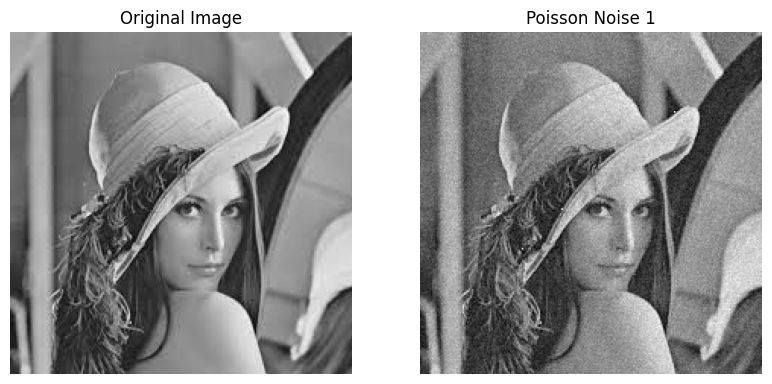

In [12]:
import cv2
import matplotlib.pyplot as plt


# Load the image
image = cv2.imread('/opt/images/lena.png', cv2.IMREAD_GRAYSCALE)

# Parameters
lamb = 10

# Apply Poisson noise
output1 = poisson_noise(image, lamb, 10)  

# Display the images
plt.figure(figsize=[15, 15])

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(output1, cmap='gray')
plt.title('Poisson Noise 1')
plt.axis('off')

plt.show()